# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [428]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [429]:
# imports
import requests
import StringIO
import zipfile

In [430]:
req = requests.get("http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip", stream=True)
z = zipfile.ZipFile(StringIO.StringIO(req.content))

In [431]:
for zip_item in z.filelist: 
    print zip_item.filename

SchoolsPlayers.csv
SeriesPost.csv
Teams.csv
TeamsFranchises.csv
TeamsHalf.csv
AllstarFull.csv
Appearances.csv
AwardsManagers.csv
AwardsPlayers.csv
AwardsShareManagers.csv
AwardsSharePlayers.csv
Batting.csv
BattingPost.csv
Fielding.csv
FieldingOF.csv
FieldingPost.csv
HallOfFame.csv
Managers.csv
ManagersHalf.csv
Master.csv
Pitching.csv
PitchingPost.csv
readme2013.txt
Salaries.csv
Schools.csv


In [432]:
salaries_csv = z.extract('Salaries.csv')
teams_csv = z.extract('Teams.csv')

In [433]:
print salaries_csv
print teams_csv

/Users/ryanwarrier/data_science/cs109/hw1/Salaries.csv
/Users/ryanwarrier/data_science/cs109/hw1/Teams.csv


In [434]:
teams = pd.read_csv(teams_csv)
print teams.shape
teams.head()

(2745, 48)


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,NaN,NaN,Y,NaN,376,1281,410,66,27,9,46,23.0,56.0,NaN,NaN,NaN,266,137,4.95,27,0,0,747,329,3,53,16,194,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,1196,323,52,21,10,60,22.0,69.0,NaN,NaN,NaN,241,77,2.76,25,0,1,753,308,6,28,22,218,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,1372,426,70,37,3,60,19.0,73.0,NaN,NaN,NaN,303,109,3.55,22,1,3,828,367,2,42,23,225,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,NaN,NaN,N,NaN,310,1353,375,54,26,6,48,13.0,48.0,NaN,NaN,NaN,303,137,4.37,32,0,0,846,371,4,45,13,217,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,1404,403,43,21,1,33,15.0,46.0,NaN,NaN,NaN,313,121,3.72,32,1,0,879,373,7,42,22,227,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [435]:
teams.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [436]:
salaries = pd.read_csv(salaries_csv)
print salaries.shape
salaries.head()

(23956, 5)


,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667


In [437]:
salaries.dtypes

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [438]:
# as_index=False is effectively “SQL-style” grouped output. 
# Makes salaries_per_team_per_year a DF instead of group_by object
salaries_per_team_per_year = salaries.groupby(['teamID','yearID'] , as_index=False)
salaries_per_team_per_year.head()

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667
22,1985,BOS,AL,stanlbo01,1075000
23,1985,BOS,AL,boggswa01,1000000
24,1985,BOS,AL,armasto01,915000
25,1985,BOS,AL,evansdw01,800000
26,1985,BOS,AL,riceji01,779227


In [439]:
total_salary_per_team_per_year = salaries_per_team_per_year.sum()
total_salary_per_team_per_year.head()

,teamID,yearID,salary
0,ANA,1997,31135472
1,ANA,1998,41281000
2,ANA,1999,55388166
3,ANA,2000,51464167
4,ANA,2001,47535167


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [440]:
# Reduce the Teams Data Frame to only use columns we care about
reduced_teams = teams[['yearID', 'teamID', 'W']]
reduced_teams.head()

,yearID,teamID,W
0,1871,PH1,21
1,1871,CH1,19
2,1871,BS1,20
3,1871,WS3,15
4,1871,NY2,16


In [441]:
merged_teams = pd.merge(total_salary_per_team_per_year, reduced_teams, on=['yearID', 'teamID'])
print merged_teams.shape
merged_teams.head()

(828, 4)


,teamID,yearID,salary,W
0,ANA,1997,31135472,84
1,ANA,1998,41281000,85
2,ANA,1999,55388166,70
3,ANA,2000,51464167,82
4,ANA,2001,47535167,75


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.

In [442]:
starting_year = 1998
ending_year = 2007
print merged_teams[(merged_teams['yearID'] >= starting_year) & (merged_teams['yearID'] <= ending_year)].salary.max()
print merged_teams[(merged_teams['yearID'] >= starting_year) & (merged_teams['yearID'] <= ending_year)].salary.min()

208306817
10641500


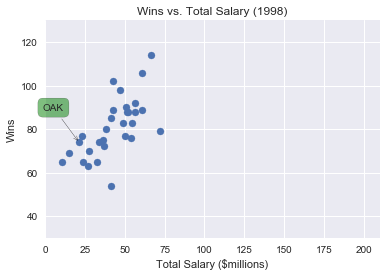

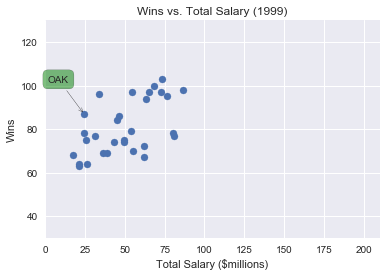

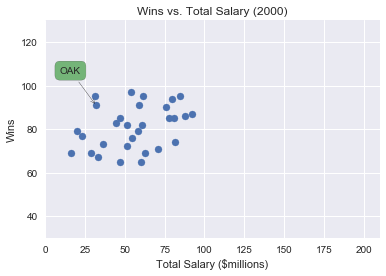

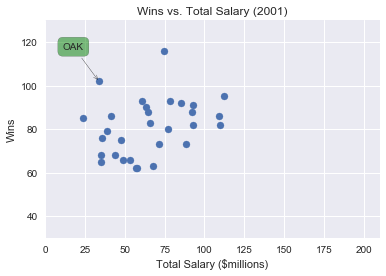

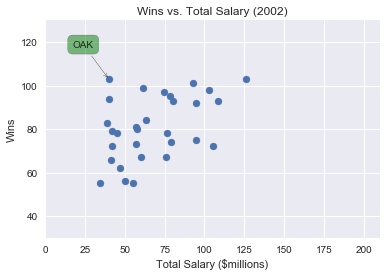

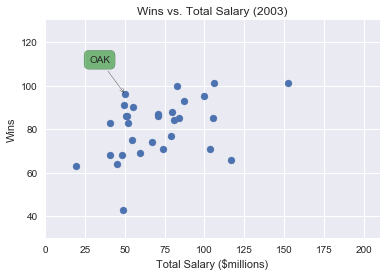

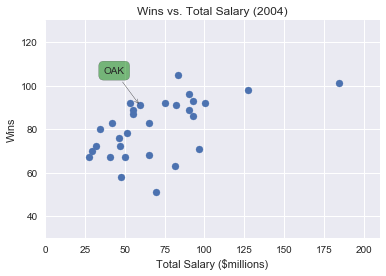

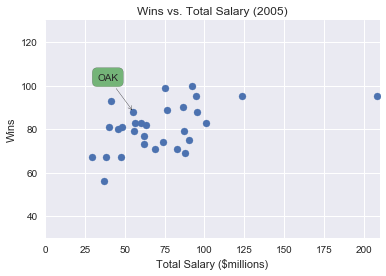

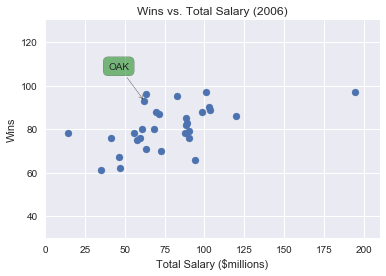

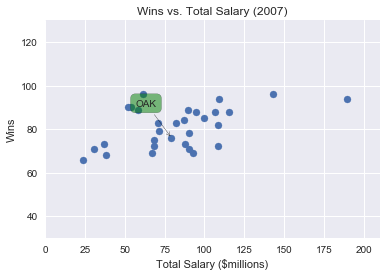

In [443]:
oakland_id = 'OAK'
for year in np.arange(starting_year, ending_year + 1):
    that_year = merged_teams[merged_teams['yearID'] == year]
    plt.scatter(that_year.salary / 1e6, that_year.W)
    plt.title('Wins vs. Total Salary ({})'.format(year))
    plt.xlabel('Total Salary ($millions)')
    plt.ylabel('Wins')
    plt.xlim(0, 210)
    plt.ylim(30, 130)
    plt.annotate(oakland_id, 
        xy = (that_year['salary'][that_year['teamID'] == oakland_id] / 1e6,  that_year['W'][that_year['teamID'] == oakland_id]), 
        xytext = (-15, 30), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round, pad=0.5', fc = 'green', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', facecolor = 'black' , connectionstyle = 'arc3,rad=0')
    )
    plt.show()

**Notes**: Used a scatter plot as it is a great way to see the correlation between two variables. In this case, team salaries and wins per season. I looked at these scatter plots from 1998-2007, and it looks like the Oakland A's competitive advantage began in 1999 when the number of wins went up significantly and went up slightly more in 2000. 2001-2003 was when the A's had the greatest comeptitive advantage and were in the top 4 of the league during those years. The competitive advatage declined starting in 2004.

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

In [444]:
resid_data = pd.DataFrame(index=range(starting_year, ending_year + 1), columns=merged_teams['teamID'].unique())

for year in np.arange(starting_year, ending_year + 1):
    data_for_year = merged_teams[merged_teams['yearID'] == year]
    x = data_for_year['salary'].values / 1e6
    y = data_for_year['W'].values
    
    # y = Ap where A = [x, 1] and p = [m, c] where m is slope and c is intercept
    # Add to end of x vector for fitting intercept
    A = np.array([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y)[0]
    
    # regression model predictions
    yhat = (m*x+c)
    
    # Annual Residuals
    residuals = y - yhat
    
    # Set residual for each team using year as index
    for i, team_id in enumerate(data_for_year['teamID']):
        resid_data[team_id][year] = residuals[i]

        
resid_data

,ANA,ARI,ATL,BAL,BOS,CAL,CHA,CHN,CIN,CLE,COL,DET,FLO,HOU,KCA,LAA,LAN,MIA,MIL,MIN,ML4,MON,NYA,NYN,OAK,PHI,PIT,SDN,SEA,SFN,SLN,TBA,TEX,TOR,WAS
1998,4.76887,-10.0603,14.2482,-19.2167,2.8116,NaN,1.47398,4.23743,7.34675,-2.52853,-8.55806,-5.26676,-26.2552,21.1363,-5.67376,NaN,-1.59459,NaN,-1.96774,-2.50232,NaN,2.50256,18.9949,1.51973,5.33184,-2.34675,3.94231,14.539,-11.6431,8.02523,-4.98194,-9.12755,-1.08138,1.92604,NaN
1999,-12.8156,12.6134,14.0906,-13.4722,8.40064,NaN,2.40295,-18.2031,20.5391,8.14608,-13.0633,-7.32831,-7.0403,14.3471,-8.80473,NaN,-14.5603,NaN,-4.69268,-8.09952,NaN,-1.94801,4.42406,10.8533,14.8108,2.31843,5.71957,-6.88646,-3.38204,6.20279,-5.8899,-8.14541,4.86517,4.5978,NaN
2000,1.69556,0.131503,9.58963,-10.9333,0.608153,NaN,17.8342,-16.7055,5.40525,5.92611,0.206248,-2.35438,3.57278,-8.27741,1.02303,NaN,0.0668238,NaN,-4.99508,-5.90965,NaN,-10.4531,0.385391,9.36586,13.7049,-14.6628,-7.82534,-4.82267,9.5453,16.3446,13.1533,-13.0491,-12.2889,3.71846,NaN
2001,-2.92539,7.73679,2.58002,-18.3121,-6.47508,NaN,2.01633,7.17463,-12.1703,5.3748,-8.97747,-12.9181,0.0617553,12.8672,-10.8809,NaN,-2.31812,NaN,-9.30958,11.0252,NaN,-7.83646,6.14491,-3.62899,26.3912,9.06565,-17.6514,2.48443,33.4859,9.41696,9.84148,-17.5196,-11.8625,-2.8813,NaN
2002,19.686,7.82209,13.4522,-11.9894,1.35605,NaN,2.92013,-16.0066,3.09284,-9.85742,-5.02653,-22.5499,4.90449,4.22953,-13.4905,NaN,3.92862,NaN,-20.2916,20.3155,NaN,9.77929,6.7136,-13.0139,29.4268,1.68165,-2.18636,-7.94883,8.77958,11.3037,14.2656,-17.0866,-18.8932,-5.31682,NaN
2003,-5.58287,1.09241,12.9805,-10.5531,8.2386,NaN,9.01552,5.24997,-9.65184,-8.49996,-6.21498,-33.6165,14.3272,6.01377,8.1117,NaN,-2.88544,NaN,-6.91008,12.1175,NaN,5.82802,3.68913,-24.1438,19.1652,5.06571,-2.74416,-11.8257,8.83331,16.6538,1.46714,-7.71513,-16.4697,8.96378,NaN
2004,4.03057,-30.1027,10.342,0.951479,4.05475,NaN,2.91729,3.25771,0.0696821,6.81512,-12.1347,-3.97871,8.06824,9.6433,-18.1522,NaN,6.73479,NaN,-4.66864,14.5135,NaN,-7.65366,-5.64884,-16.1045,12.2094,-0.26904,-0.717922,9.11161,-20.7229,7.16471,20.8947,-2.12148,11.1863,-9.68986,NaN
2005,NaN,-2.34544,6.89829,-7.14902,6.13068,NaN,17.6543,-4.19132,-6.27747,16.8969,-10.0896,-9.39828,3.95352,7.40501,-19.3837,10.5889,-11.5695,NaN,5.14091,4.61093,NaN,NaN,-7.07125,-2.41333,9.72928,3.4871,-8.57858,2.50485,-14.3036,-8.6843,16.0188,-7.26247,0.663392,3.24035,3.7948
2006,NaN,-2.00032,-4.10776,-10.1627,-2.12642,NaN,4.78143,-17.823,1.79431,0.611907,1.09225,13.1567,7.54415,-0.862645,-13.9236,3.66053,3.50272,NaN,-2.64568,17.3776,NaN,NaN,-3.62378,12.0606,14.5708,2.20794,-8.82704,8.28809,-4.73952,-7.09092,0.104348,-12.8493,0.567571,7.0419,-7.58003
2007,NaN,13.0704,2.3294,-13.4626,6.82747,NaN,-12.5485,1.66313,-7.14473,17.7775,12.8048,5.31863,-3.02754,-8.73361,-9.95515,9.37354,-2.51921,NaN,3.52395,-0.537022,NaN,NaN,-1.39543,2.56859,-4.60405,7.04171,-7.10849,11.257,3.74914,-11.0647,-4.07386,-7.16833,-4.11696,2.04924,-1.89443


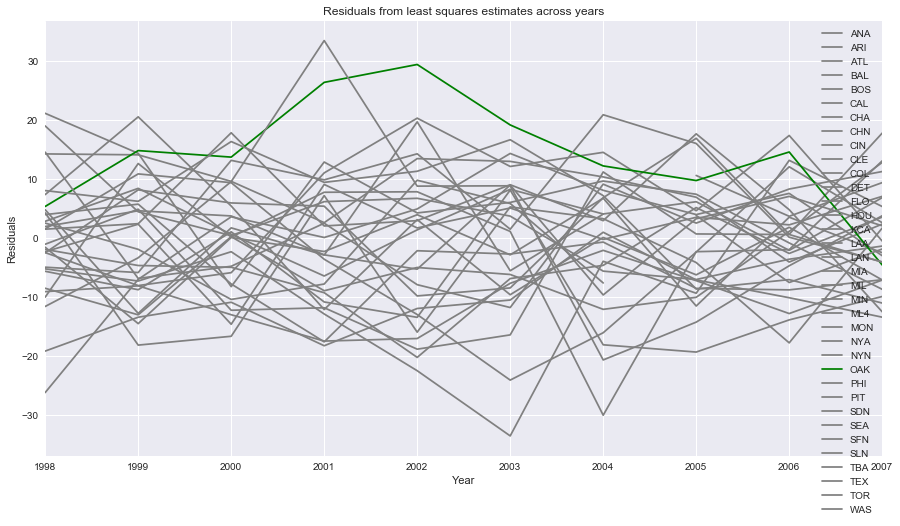

In [445]:
resid_data.index.format()
resid_data.plot(title = 'Residuals from least squares estimates across years', figsize = (15, 8),
               color=map(lambda x: 'green' if x=='OAK' else 'gray', resid_data.columns))
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

Combining both plots from 1(d) and 1(e), it seems that 2001-2003 were the most significant years of competitive advantage for the Oakland A's. Michael Lewis' _Moneyball_ shows how this advantage was a result of the sabermetric approach to assembling a competitive baseball team conducted by the A's general manager Billy Beane. From 2004 on, this advantage seemed to go away as other teams caught on.

## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [446]:
countries = pd.read_csv("https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv")
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [447]:
import xlrd
income = pd.read_excel("gdp_per_capita_ppp.xlsx")
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,...,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,604.0,607.0,609.0,611.0,613.0,615.0,617.0,619.0,621.0,623.0,625.0,627.0,630.0,632.0,634.0,636.0,638.0,640.0,643.0,645.0,647.0,649.0,651.0,654.0,656.0,658.0,660.0,663.0,665.0,...,1168.0,1173.0,1187.0,1178.0,1174.0,1092.0,1046.0,1137.0,1170.0,1201.0,1231.0,1119.0,1179.0,1155.0,1158.0,1284.0,1402.0,1454.0,1429.0,1384.0,1486.0,1230.0,1113.0,1087.0,1028.0,1022.0,941.0,810.0,725.0,872.0,895.0,921.0,947.0,972.0,962.0,862.0,1053.0,1097.0,1067.0,1146.0,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,669.0,671.0,672.0,674.0,676.0,677.0,679.0,680.0,682.0,683.0,685.0,686.0,688.0,689.0,691.0,693.0,694.0,696.0,697.0,699.0,701.0,702.0,704.0,705.0,707.0,709.0,710.0,712.0,713.0,...,3242.0,3359.0,3475.0,3587.0,3712.0,3849.0,3988.0,4174.0,4177.0,4178.0,4182.0,4188.0,4194.0,4201.0,4218.0,4227.0,4237.0,4248.0,4259.0,4267.0,4281.0,4294.0,4307.0,4325.0,4350.0,3081.0,2877.0,3172.0,3457.0,3941.0,4326.0,3909.0,4434.0,4912.0,5305.0,5730.0,5913.0,6274.0,6672.0,7075.0,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,725.0,726.0,727.0,728.0,729.0,730.0,731.0,732.0,733.0,734.0,735.0,743.0,751.0,759.0,768.0,776.0,784.0,793.0,802.0,810.0,819.0,828.0,837.0,846.0,855.0,865.0,874.0,884.0,893.0,903.0,913.0,923.0,933.0,943.0,953.0,964.0,974.0,985.0,996.0,...,5478.0,5811.0,6319.0,6747.0,7227.0,6427.0,7556.0,7581.0,7812.0,8119.0,8400.0,8888.0,9730.0,10293.0,10166.0,10160.0,10477.0,10696.0,10947.0,11030.0,10722.0,10378.0,9888.0,10115.0,10113.0,9748.0,9693.0,9279.0,9006.0,9168.0,9375.0,9322.0,9646.0,9810.0,9885.0,10203.0,10634.0,11251.0,11575.0,12077.0,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [448]:
income = income.T
income.columns = income.iloc[0]
income = income.ix[1:]
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,Christmas Island,Cocos Island,Colombia,Comoros,"Congo, Dem. Rep.",...,Spain,Sri Lanka,Sudan,Suriname,Svalbard,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Transnistria,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,USSR,Uzbekistan,Wallis et Futuna,Vanuatu,Venezuela,West Bank and Gaza,West Germany,Western Sahara,Vietnam,Virgin Islands (U.S.),North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,1507,514,833,815,1848,775,1445,1235,876,913,608,2412,579,597,1227,629,854,669,397,1109,NaN,1512,1089,480,418,903,626,1314,529,1039,424,418,NaN,1026,985,NaN,NaN,963,696,485,...,1518,898,518,1636,NaN,490,1414,2701,1081,996,556,562,931,521,682,NaN,663,NaN,1230,716,1221,943,487,719,464,763,998,3431,2128,1758,NaN,502,NaN,585,682,1220,NaN,NaN,861,NaN,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,1508,514,833,816,1855,775,1445,1240,876,914,608,2413,579,597,1227,629,854,669,397,1109,NaN,1512,1089,480,418,904,626,1322,529,1039,424,418,NaN,1026,985,NaN,NaN,963,697,487,...,1518,898,518,1637,NaN,490,1402,2701,1081,996,557,562,932,522,683,NaN,663,NaN,1230,716,1221,944,487,719,464,764,1001,3439,2168,1758,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,1508,514,833,818,1863,775,1445,1246,876,914,608,2413,579,597,1228,630,854,669,397,1109,NaN,1512,1089,480,419,904,626,1330,529,1039,424,418,NaN,1027,985,NaN,NaN,963,697,489,...,1518,898,518,1637,NaN,490,1467,2702,1081,996,557,562,932,523,683,NaN,663,NaN,1231,716,1222,945,487,719,464,765,1005,3450,2203,1758,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,1508,514,833,820,1870,775,1446,1251,876,914,609,2413,579,597,1228,630,854,669,397,1109,NaN,1513,1089,480,419,904,626,1339,529,1039,424,418,NaN,1027,985,NaN,NaN,963,698,491,...,1518,898,518,1637,NaN,490,1453,2702,1082,996,557,562,932,524,683,NaN,663,NaN,1231,716,1222,946,487,719,464,766,1009,3339,2167,1759,NaN,502,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN
1804,NaN,603,NaN,668,719,NaN,1206,628,NaN,757,1508,514,833,822,1878,775,1446,1256,876,914,609,2414,579,597,1228,630,854,669,397,1109,NaN,1513,1090,480,420,904,626,1347,530,1040,424,418,NaN,1027,985,NaN,NaN,963,699,493,...,1519,899,519,1637,NaN,490,1358,2703,1082,996,557,562,932,525,683,NaN,663,NaN,1231,716,1222,947,487,719,464,767,1013,3291,2166,1759,NaN,503,NaN,586,682,1221,NaN,NaN,861,NaN,NaN,NaN,887,NaN,670,873,NaN,508,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

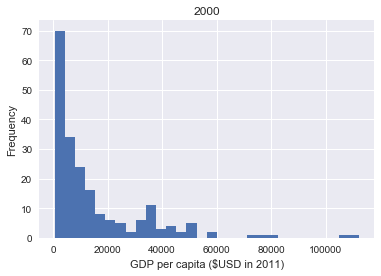

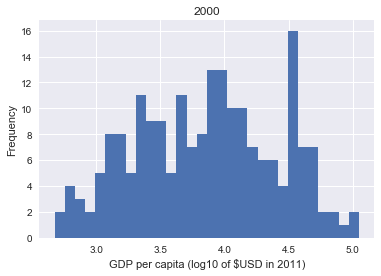

In [449]:
year = 2000
plt.hist(income.ix[year].dropna().values, bins=30)
plt.title(year)
plt.xlabel('GDP per capita ($USD in 2011)')
plt.ylabel('Frequency')
plt.show()

plt.hist(np.log10(income.ix[year].dropna().values.astype(int)), bins=30)
plt.title(year)
plt.xlabel('GDP per capita (log10 of $USD in 2011)')
plt.ylabel('Frequency')
plt.show()

The best kind of plot for viewing a frequency distribution of values is a histogram. I plotted both the untransformed data and the log10 scale plot since the range of actual values for GDP per capita were extremely large.

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [450]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""

def mergeByYear(yr):
    income_by_year = pd.DataFrame({'Income' : income.ix[yr].values, 'Country': income.columns})
    income_with_region = pd.merge(income_by_year, countries, on=['Country'])
    return income_with_region

In [451]:
mergeByYear(2010).head()

,Country,Income,Region
0,Afghanistan,1637,ASIA
1,Albania,9374,EUROPE
2,Algeria,12494,AFRICA
3,Andorra,38982,EUROPE
4,Angola,7047,AFRICA


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

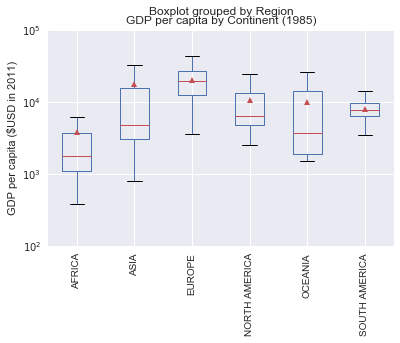

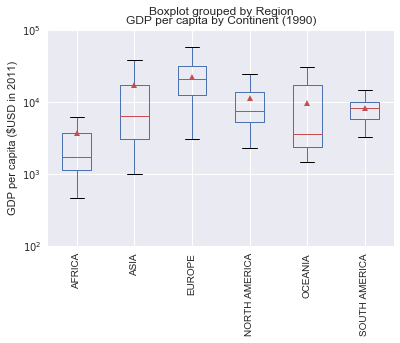

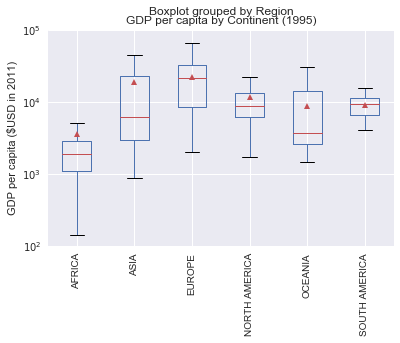

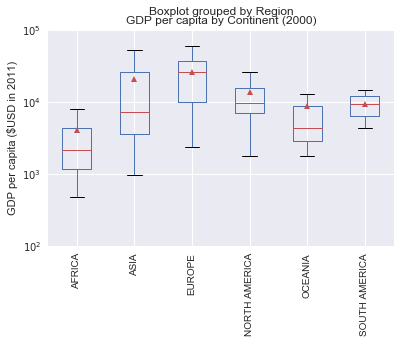

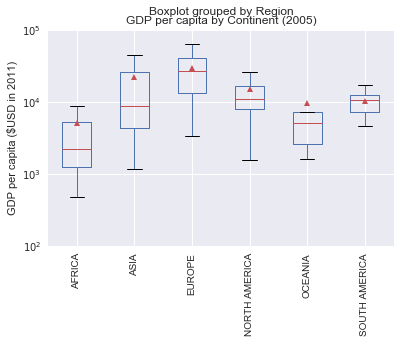

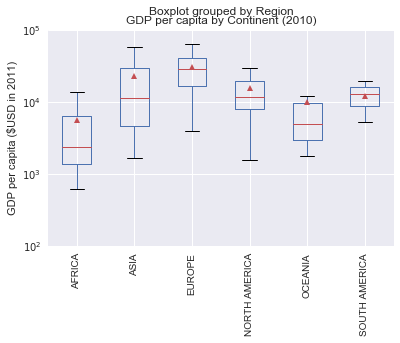

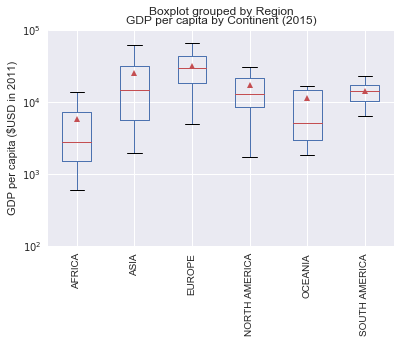

In [452]:
years = np.arange(1985, 2015 + 1, 5)
for yr in years:
    continent_yr_df = mergeByYear(yr)
    continent_yr_df.dropna(inplace=True)
    continent_yr_df['Income'] = continent_yr_df['Income'].astype(int)
    continent_yr_df.boxplot('Income', by='Region', showmeans=True, rot=90)
    plt.title("GDP per capita by Continent ({})".format(yr))
    plt.xlabel('')
    plt.ylabel('GDP per capita ($USD in 2011)')
    plt.ylim(10**2, 10**5)
    plt.yscale('log')

The largest change by far is Asia which has had trmemdous GDP per capita growth. Africa has had substantial GDP per capita growth, but is still heavily unequal compared to the Europe, Asia, and the Americas. Both North and South America have had small GDP per capita growth of its nations and Europe and Oceania have been the most stagnant in this regard. 

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

In 2b we saw how per capita GDP was heavily unequally distributed following more of an exponential distribution. There were many counties with very low per capita GDP, and a fat tail of country's with higher per capita GDP. 

In 2c, we looked at per capita GDP accross continents. We saw that Asia had explosive growth in that regard, Africa had substantial growth(but is still objectively low relative to other continents), and that more developed continents had miniscule growth. Inter-continental income inequality as measured by GDP per capita has decreased substantially for Asia and relative to more developed continents, and somewhat for Africa. However, the same inequality structure in terms of which continent has more GDP per capita relative to another seems to have not changed over the last 30 years.

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [453]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
def ratioNormals(diff, a):
    X = sp.stats.norm(loc=diff, scale=1)
    Y = sp.stats.norm(loc=0, scale=1)
    return X.sf(a) / Y.sf(a) # .sf is survival function. i.e. Pr(X > a)

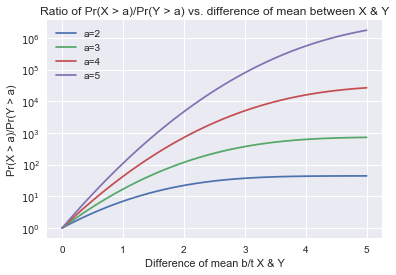

In [454]:
diffs = np.linspace(0, 5, 50)
a_vals = range(2, 6)
for a in a_vals:
    ratios = [ratioNormals(diff, a) for diff in diffs]
    plt.plot(diffs, ratios)

# Plot Description
plt.title('Ratio of Pr(X > a)/Pr(Y > a) vs. difference of mean between X & Y')
plt.xlabel('Difference of mean b/t X & Y')
plt.ylabel('Pr(X > a)/Pr(Y > a)')
plt.legend(["a={}".format(a) for a in a_vals])
plt.yscale('log') # Needed because of a=5 so that other a values can be seen

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [455]:
country_region_income_2012 = mergeByYear(2012)
asia_sa_2012 = country_region_income_2012[
    (country_region_income_2012.Region == 'ASIA') | (country_region_income_2012.Region == 'SOUTH AMERICA')
]
asia_sa_2012 = asia_sa_2012.dropna(subset=['Income'])
asia_sa_2012.Income = asia_sa_2012.Income.astype(int)
grouped_asia_sa_2012 = asia_sa_2012.groupby('Region')

In [456]:
grouped_asia_sa_2012.Income.mean()

Region
ASIA             23500.432432
SOUTH AMERICA    13015.750000
Name: Income, dtype: float64

(1000, 60000)

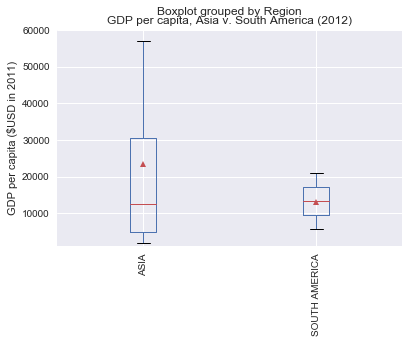

In [457]:
asia_sa_2012.boxplot('Income', by='Region', showmeans=True, rot=90)
plt.title("GDP per capita, Asia v. South America (2012)")
plt.xlabel('')
plt.ylabel('GDP per capita ($USD in 2011)')
plt.ylim(1000, 60000)

Asia has the larger average of income per person across the countries in its region relative to South America by nearly double.

#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [458]:
grouped_asia_sa_2012.size()

Region
ASIA             37
SOUTH AMERICA    12
dtype: int64

In [459]:
grouped_asia_sa_2012.apply(lambda x: (x.Income > 10000).mean())

Region
ASIA             0.567568
SOUTH AMERICA    0.750000
dtype: float64

In [460]:
grouped_asia_sa_2012.Income.std()

Region
ASIA             28403.274653
SOUTH AMERICA     5181.692967
Name: Income, dtype: float64

South America has a larger proportion of countries with income per person greater than 10,000 dollars relative to Asia. This is not parallel with the results in 3(b), where where we found Asia has a higher avg. income per person across its countries relative to South America.

The reason for this is:
South America has many fewer countries than Asia, and a much smaller standard deviation of gdp cer capita for its countries. The South American avg. gdp cer capita of 13015 is close to its median, while Asia's median is well below its average, and in fact, below that of South America. Asia has a handful of countries with very high gdp cer capita values, and this gives them the advantage when calculating the average. Given those facts, the result is not surprising.

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [462]:
# Optional: do the same analysis with population weighted gdp per capita for each Region 

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

The problem starts with the general question of: _If group A has larger values than group B on average, does this mean the largest values are from group A?_

In short, No. The example of GDP per capita in Asia vs. South America in 2012 showed this assumption doesn't always hold. In this case, the average GDP per capita for a country in Asia was higher than that of South America, but the proportion of countries with GDP per capita higher than $10,000 was higher in South America than in Asia. This is due to a difference in probability distributions of GDP per capita for the countries in either region. Asia had a standard deviation around 4 times as large as South America, as well as a lower median.